<a href="https://colab.research.google.com/github/Messbah/Tensorflow_Practice/blob/main/Classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#creating a sample data for binary classification
from sklearn.datasets import make_circles
n_samples = 1000
X,y = make_circles(n_samples, noise = 0.03, random_state = 42)


In [ ]:
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [ ]:
import pandas as pd
circles =  pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


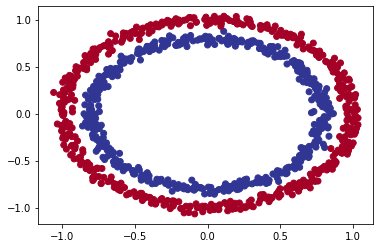

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
y= tf.constant(y)
y

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
#model creation
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
#model compilation
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])
#model fitting
history = model.fit(X, y, epochs=100, verbose=0)
model.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932450532913208, 0.5]

First model has 50% accuracy which is meaningless. Let's try to improve it.

In [ ]:
tf.random.set_seed(42)

new_model= tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])
new_model.compile(loss=tf.keras.losses.binary_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=["accuracy"])
new_history = new_model.fit(X, y, epochs=100, verbose=0)
new_model.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000


[0.0015085524646565318, 1.0]

Now we have got 100% accuracy.

Text(0.5, 0, 'epochs')

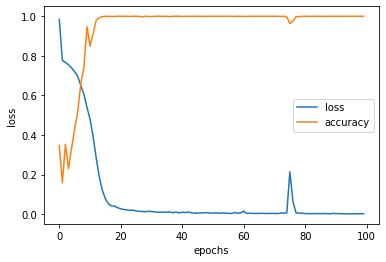

In [ ]:
pd.DataFrame(new_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               300       
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,501
Trainable params: 10,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import numpy as np

In [ ]:
#Function to plot the result: 
def plot_decision(model,X,y):
  X_min,X_max = X[:,0].min() -0.1, X[:,0].max()+0.1
  y_min,y_max = X[:,0].min() -0.1, X[:,0].max()+0.1
  xx,yy = np.meshgrid(np.linspace(X_min,X_max,100),
                      np.linspace(y_min,y_max,100))
  X_in = np.c_[xx.ravel(),yy.ravel()] #stack 2D arrays together

  # Make Predictions
  y_pred = model.predict(X_in)
  if len(y_pred[0]) > 1:
    print("Doing Multiclass Classification")
    y_pred = tf.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plotting Decision Boundary
  plt.contourf(xx, yy, y_pred,2, cmap = "RdGy")
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap="RdGy")
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

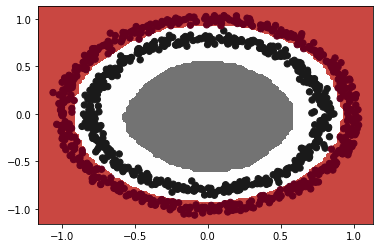

In [ ]:
plot_decision(model=new_model, X=X, y=y)

In [ ]:
len(X)

1000

In [ ]:
X_train,y_train = X[:800], y[:800]
X_test,y_test = X[800:],y[800:]
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
tf.random.set_seed(42)

test_model = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                              
])

test_model.compile(loss="binary_crossentropy",
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                   metrics=["accuracy"])
test_history = test_model.fit(X_train, y_train, epochs=25, verbose=0)
test_model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

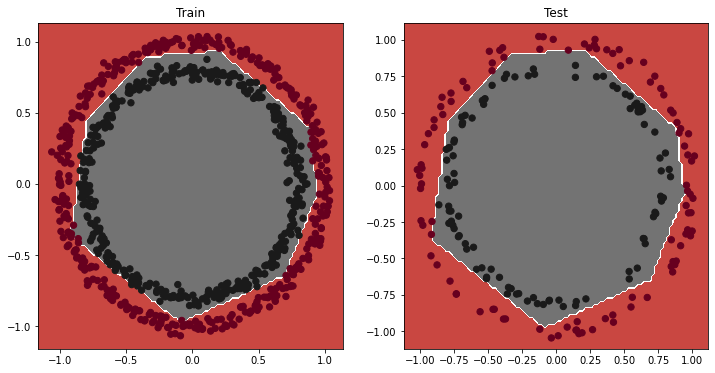

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision(test_model,X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision(test_model,X=X_test, y=y_test)
plt.show()

This new model provides 100% accuracy after 25 epochs only due to increased learning rate. 

Text(0.5, 0, 'epochs')

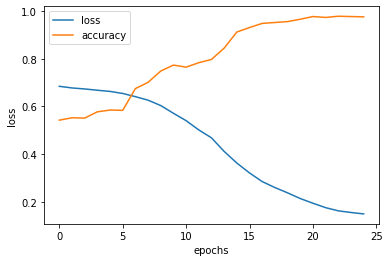

In [ ]:
pd.DataFrame(test_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(42)

# Create a model (same as model_8)
model_lr = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_lr.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_lr = model_lr.fit(X_train,
                        y_train, 
                        epochs=100,
                        callbacks=[lr_scheduler])

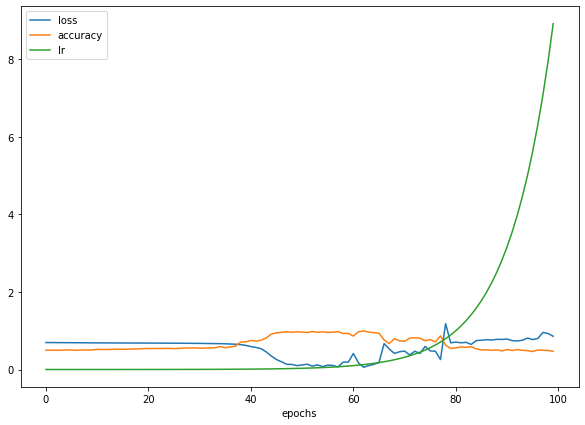

In [ ]:
pd.DataFrame(history_lr.history).plot(figsize=(10, 7), xlabel="epochs");

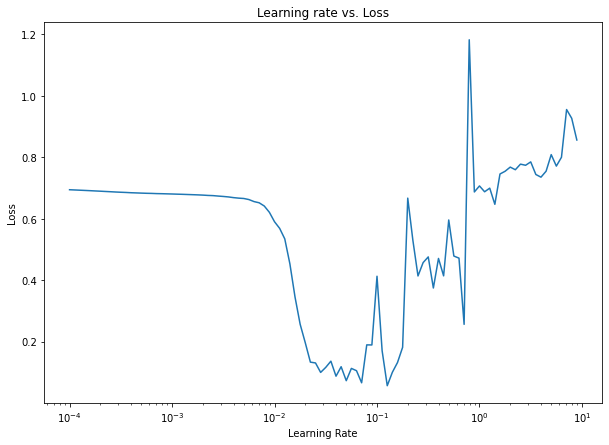

In [ ]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_lr.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

**Optimal learning rate in between 10^-2 and 10^-1**

**Multiclass Classification**:
I will try to Classify Images of cloths in this section. The dataset I am going to use is called **fashion_mnist**. It is available in Tensorflow datasets. The dataset consists of a trainning set of 60,000 examples and a test set of 10,000 examples. 

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

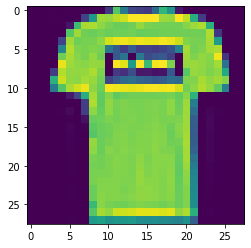

In [8]:
# Plot a sample
import matplotlib.pyplot as plt
plt.imshow(train_data[1])


In [9]:
train_labels[1]

0

Labels are as follows: \
0- T-shirt/Top \
1- Trouser \
2- Pullover \
3- Dress \
4- Coat \
5- Sandal \
6- Shirt \
7- Sneaker \
8- Bag \
9- Ankle boot \
So the upper example's label (0) indicates that It is a T-shirt.

In [10]:
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal" , "Shirt", "Sneaker", "Bag","Ankle boot"]


Text(0.5, 1.0, 'T-shirt/Top')

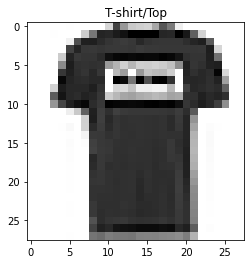

In [14]:
index = 1
plt.imshow(train_data[index],cmap =plt.cm.binary)
plt.title(class_names[train_labels[index]])

**Model Creation** \
* Input Shape = 28*28 (Image shape) 
* Output Shape = 10 (One per class of clothing)
* Loss Function = CategoricalCrossentropy() (if labels are one hot encoded)
  **OR** SparseCategoricalCrossentropy() (If labels are integers)
* Output Layer Activation = Softmax

In [23]:
# One hot encoding for the labels
#tf.one_hot(train_labels,depth=10)

In [37]:
tf.random.set_seed(42)
cloth_classification_model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])
cloth_classification_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                                   metrics=["accuracy"])
model_history = cloth_classification_model.fit(train_data,train_labels,epochs=100,verbose = 0, validation_data=(test_data,test_labels))

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 3.7180 - accuracy: 0.7154 - val_loss: 0.7125 - val_accuracy: 0.7512
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8249 - accuracy: 0.7258 - val_loss: 0.9633 - val_accuracy: 0.6594
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9409 - accuracy: 0.6308 - val_loss: 1.5151 - val_accuracy: 0.4893
Epoch 4/100
1875/1875 [==============================] - 9s 5ms/step - loss: 1.8922 - accuracy: 0.2479 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3039 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3038 - accuracy: 0.1004 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3039 - accuracy: 0.0975 - val_loss: 2.3031 - val_ac

In [25]:
# Performing Normalization to see if it yeilds better result
#train_data_norm = train_data/255.0
#test_data_norm = test_data/255.0


In [38]:
tf.random.set_seed(42)
cloth_classification_model_norm = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])
cloth_classification_model_norm.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                                   metrics=["accuracy"])
model_history_norm = cloth_classification_model.fit(train_data_norm,train_labels,epochs=40,verbose = 0, validation_data=(test_data_norm,test_labels))

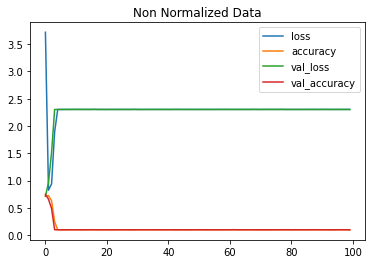

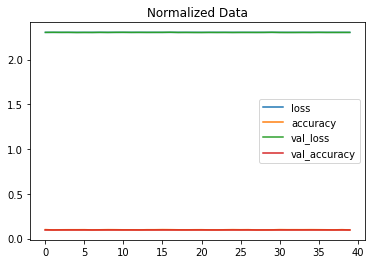

In [39]:
import pandas as pd

pd.DataFrame(model_history.history).plot(title="Non Normalized Data")

pd.DataFrame(model_history_norm.history).plot(title = "Normalized Data")


So, **Normalized Data** gives better accuracy. Now let's find optimal learning rate:

In [33]:
tf.random.set_seed(42)
lr_model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])
lr_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                                   optimizer=tf.keras.optimizers.Adam(),
                                   metrics=["accuracy"])

lr_scheduler_new = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 *10**(epoch/20))


lr_model_history = cloth_classification_model.fit(train_data_norm,train_labels,epochs=40,validation_data=(test_data_norm,test_labels),callbacks=[lr_scheduler_new])

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9098 - accuracy: 0.1986 - val_loss: 1.8964 - val_accuracy: 0.1991 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8963 - accuracy: 0.2006 - val_loss: 1.8961 - val_accuracy: 0.1990 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8912 - accuracy: 0.2023 - val_loss: 1.8888 - val_accuracy: 0.2006 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8870 - accuracy: 0.2029 - val_loss: 1.8882 - val_accuracy: 0.2007 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8813 - accuracy: 0.2004 - val_loss: 1.8790 - val_accuracy: 0.2023 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8822 - accuracy: 0.2019 - val_loss: 1.8800 - val_accuracy: 0.2043 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Finding the ideal learning rate')

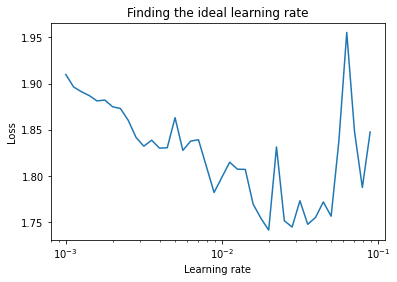

In [34]:
lrsn = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrsn,lr_model_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [36]:
1/100

0.01